# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Elsa Novita
- **Email:** elsanovitaca@gmail.com
- **ID Dicoding:** chaelsanvta

## Menentukan Pertanyaan Bisnis

- Pada jam berapa penyewaan sepeda terbanyak dan sedikit terjadi?
- Pada musim apa yang memiliki tingkat penyewaan sepeda tertinggi dan terendah?
- Seberapa signifikan jumlah penyewaan sepeda pada saat hari libur dibanding dengan hari biasa ?
- Perbandingan jumlah Customer Registered dengan casual?
- Bagaimana performa total jumlah penggunaan sepeda pada tahun pertama dibandingkan tahun kedua?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

*   Memuat tabel day_df yang berisikan isi dari file day.csv

In [ ]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


*   Memuat tabel hour_df yang berisikan isi dari file hour.csv

In [ ]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

*   Dataset Information


In [4]:
print('\n', hour_df.info())
print('\n', day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

 None
<class 'pandas.core.frame.DataFrame'>
Rang

*   Checking Missing Value



In [5]:
print('\n', hour_df.isna().sum())
print('\n', day_df.isna().sum())


 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dapat diketahui, bahwa tidak ada missing value di dataframe hour_df dan day_df.

*   Checking Duplicated Data



In [6]:
print('Jumlah data duplikat hour:', hour_df.duplicated().sum())
print('Jumlah data duplikat day:', day_df.duplicated().sum())

Jumlah data duplikat hour: 0
Jumlah data duplikat day: 0


Dapat diketahui, bahwa tidak ada data yang duplikat dari hour_df dan day_df.

*   Statistical Description of the Dataset



In [7]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [8]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Cleaning Data

* Dropping kolom workingday. Menurut saya kolom workingday sama saja dengana kolom weekday.

In [9]:
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)


* Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'. <br>
   **Categorical data adalah kumpulan informasi yang berbentuk kelompok/group

In [10]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

* Menghandling tipe data 'dteday' yang tadinya 'object' akan kita ubah menjadi 'datetime'


In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

* Rename kolom agar lebih mudah dibaca

In [12]:
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

* Mengkonversi isi kolom agar mudah dipahami

In [13]:
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Menghitung Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100


<ipython-input-13-b8403cf05aa9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-13-b8403cf05aa9>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), i

* Membuat kolom baru  category_days yang menunjukan isi kolom tersebut weekend atau weekdays

In [14]:
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [15]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

dapat dilihat:
* Dropping kolom instant dan workingday ✓
* tipe data pada kolom dteday sudah berubah menjadi datetime ✓
* tipe data int pada season, mnth, holiday, weekday, workingday, weathersit sudah berubah menjadi tipe data category ✓
* Rename kolom agar lebih mudah dibaca  ✓
* Sudah Mengkonversi isi kolom agar mudah dipahami ✓
* Sudah membuat kolom baru bernama category_days yang berisi weekend atau weekdays ✓

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [16]:
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


**Insight:**

Berdasarkan rangkuman parameter statistik di atas, terdapat total data pelanggan sebanyak 17.379. Data menunjukkan bahwa penyewaan sepeda berlangsung dalam rentang waktu antara pukul 00.00 hingga 23.59, dengan rata-rata penyewaan terjadi sekitar pukul 11.54 dan memiliki standar deviasi sebesar 6,91.
  


- Penyewaan Berdasarkan Jam

In [17]:
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


**Insight:**

Berdasarkan data pada pivot table di atas, waktu dengan jumlah penyewaan sepeda tertinggi terjadi pada pukul **17.00**, dengan total sebanyak **336.860 penyewaan**. Sebaliknya, waktu dengan jumlah penyewaan paling sedikit adalah pukul **04.00**, dengan total hanya **4.428 penyewaan**.

### Explore Data day_df

In [18]:
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


**Insight:**

Berdasarkan rangkuman parameter statistik, terdapat total 17.379 pelanggan yang tersebar sepanjang musim 1 hingga 4. dan Penyewaan lebih banyak pada weekdays (521 hari) dibandingkan weekend.

- Jumlah penyewaan sepeda setiap season (musim)

In [19]:
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

<ipython-input-19-92db34d823b2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


**Insight:**

Berdasarkan hasil tersebut, diketahui bahwa musim Fall (Gugur) dan Summer (Panas) memiliki jumlah penyewaan terbanyak, masing-masing sebanyak 1.061.129 dan 918.589 penyewaan. Sementara itu, musim Spring (Musim Semi) mencatatkan jumlah penyewaan paling sedikit, yaitu 471.348 penyewaan.

- Jumlah Penyewaan berdasarkan Weekend dan Weekday

In [20]:
day_df.groupby(by="category_days").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

,category_days,count_cr
0,weekdays,2370845
1,weekend,921834


**Insight:**

Berdasarkan hasil diatas, jumlah penyewaan sepeda lebih tinggi pada hari kerja (weekdays) dengan 2.370.845 penyewaan, dibandingkan akhir pekan (weekend) yang hanya 921.834 penyewaan, menunjukkan dominasi aktivitas penyewaan pada hari kerja.

- Jumlah Penyewaan sepeda tiap tahun berdasarkan registered dan casual

In [21]:
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


**Insight:**  

Berdasarkan data di atas, terdapat perbedaan signifikan antara pelanggan yang sudah menjadi member dan yang belum. Pada tahun 2011, pelanggan yang sudah menjadi member sebanyak 995.851, sementara yang belum menjadi member tercatat 247.252.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa penyewaan sepeda terbanyak dan sedikit terjadi?

In [22]:
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

<ipython-input-23-ab82fc91cbbe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#0A97B0", "#D3D3D3", "#D3D3D3"], ax=ax[0])
<ipython-input-23-ab82fc91cbbe>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#FF8C9E"], ax=ax[1])


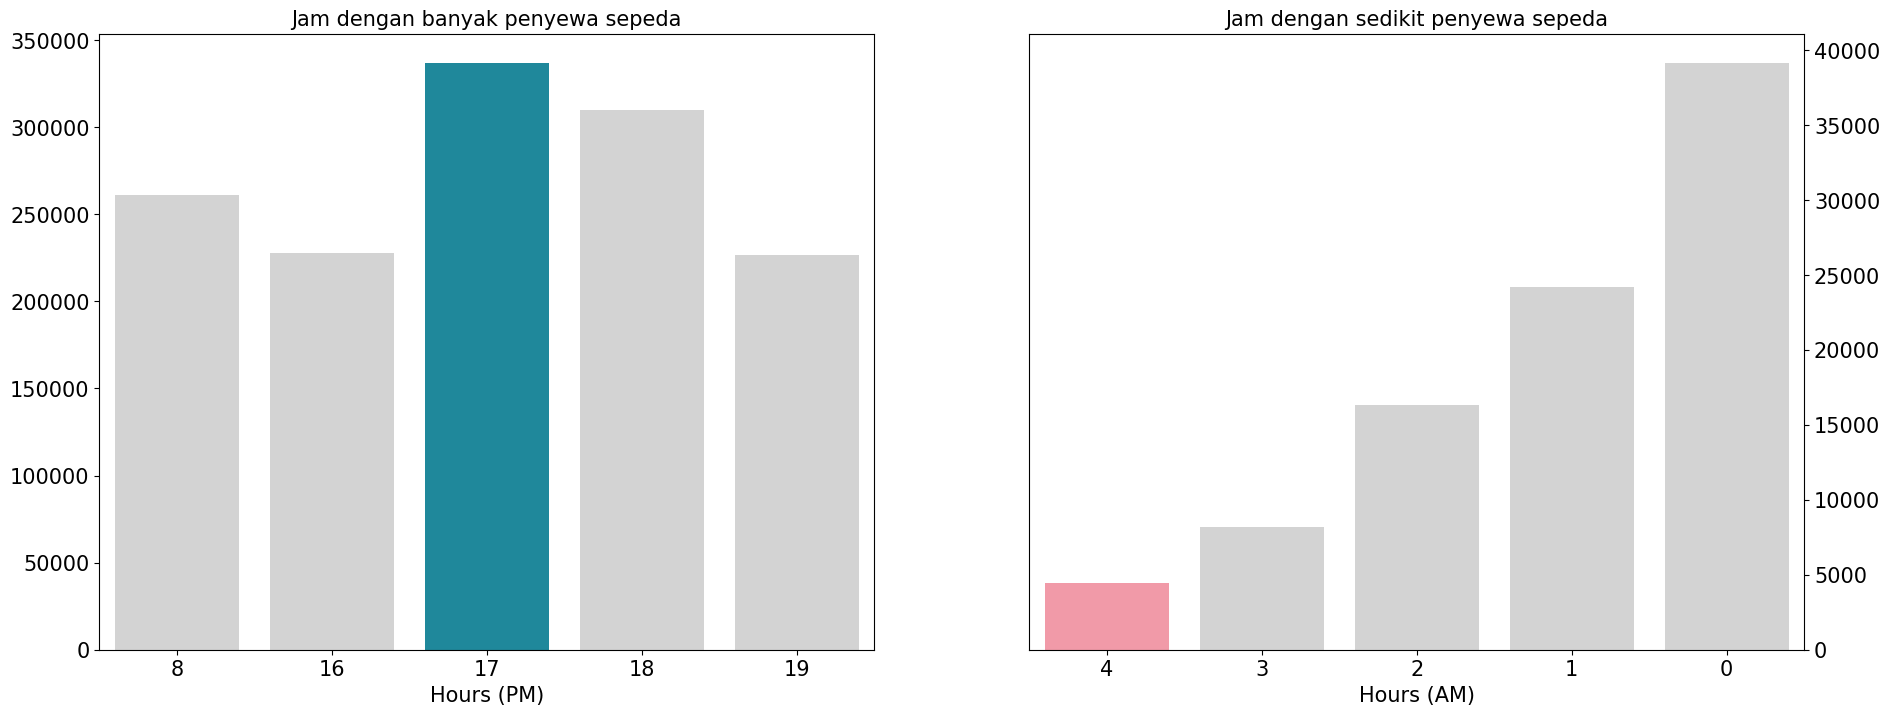

In [23]:
# membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

# membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#0A97B0", "#D3D3D3", "#D3D3D3"], ax=ax[0])

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=15)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15)

# membuat barplot untuk penyewa sepeda terdikit
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#FF8C9E"], ax=ax[1])

# mengatur label dan judul untuk subplot pertama
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=15)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=15)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)

# menampilkan plot
plt.show()

**Insight:**

Berdasarkan gambar di atas, dapat dilihat bahwa penyewaan sepeda mencapai jumlah tertinggi pada pukul 17:00, dengan sekitar 336.860 penyewaan. Sebaliknya, penyewaan pada pukul 04:00 tercatat sebagai yang terendah, dengan hanya sekitar 4.428 penyewaan.

### Pertanyaan 2: Pada musim apa yang memiliki tingkat penyewaan sepeda tertinggi dan terendah?

<ipython-input-24-2a0cffa5e7a2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


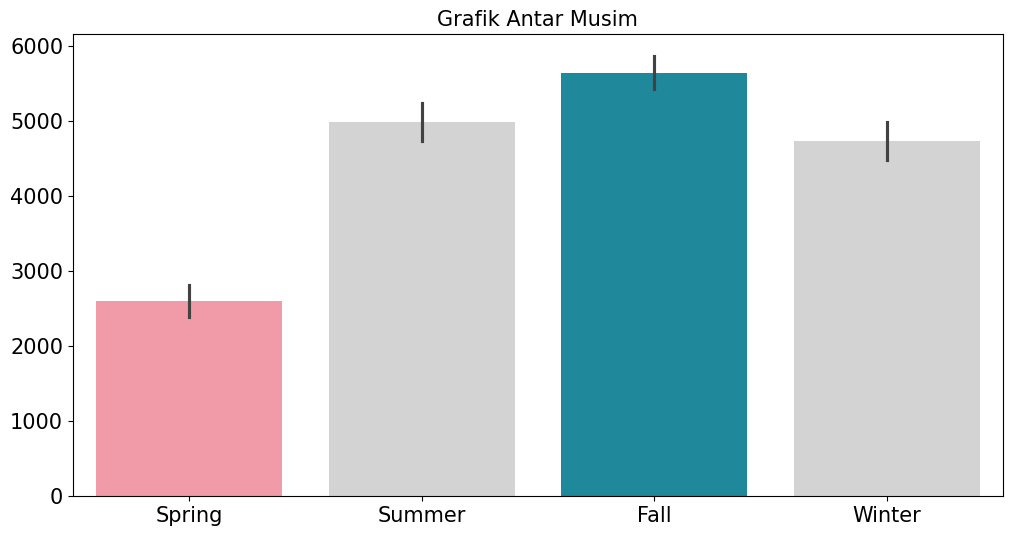

In [24]:
# mengatur warna
colors = ["#FF8C9E", "#D3D3D3", "#0A97B0", "#D3D3D3"]

# membuat subplot dengan 1 baris dan 1 kolom
fig, ax = plt.subplots(figsize=(12, 6))

# Buat barplot untuk y="count_cr" dan x="season", menggunakan data=day_df
sns.barplot(
        y="count_cr",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=15)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# menampilkan plot
plt.show()


**Insight:**

Musim yang paling banyak disewa adalah musim gugur (Fall) dengan total penyewaan sebanyak 1.061.129 penyewaan. Sementara itu, musim yang paling sedikit penyewa sepeda adalah musim semi (Spring) dengan jumlah 471.348 penyewa.

### Pertanyaan 3:  Seberapa signifikan jumlah penyewaan sepeda pada saat libur dibanding dengan hari biasa ?

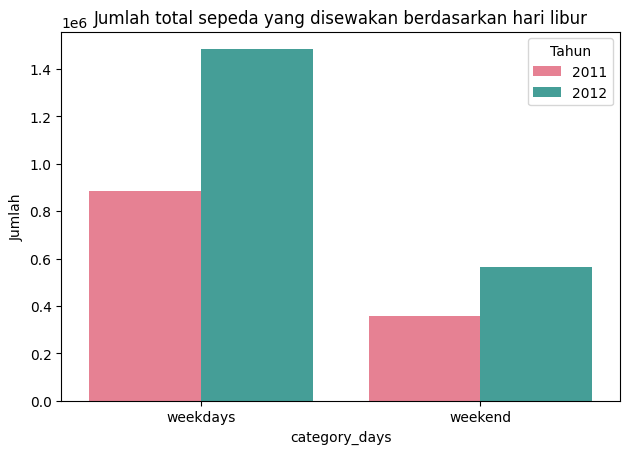

In [25]:
holiday_counts_df = day_df.groupby(by=["category_days","year"]).agg({
    "count_cr": "sum"
}).reset_index()

sns.barplot(data=holiday_counts_df, x="category_days", y="count_cr", hue="year", palette="husl")

# mengatur label dan judul untuk subplot pertama
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan hari libur")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()

# menampilkan plot
plt.show()

**Insight:**

Berdasarkan data yang ada, terdapat perbedaan signifikan antara jumlah penyewaan sepeda pada tahun 2011 dan 2012. Pada tahun 2011, jumlah penyewaan sepeda lebih tinggi pada hari biasa (weekdays) dibandingkan dengan hari libur (weekend). Hal yang sama juga terlihat pada tahun 2012, di mana penyewaan sepeda pada hari biasa jauh lebih tinggi daripada pada hari libur. Visualisasi data pada dataframe day_df menunjukkan bahwa faktor hari biasa, bukan hari libur, berkontribusi besar terhadap jumlah penyewaan sepeda.

### Pertanyaan 4: Perbadingan jumlah Customer Registered dengan casual?

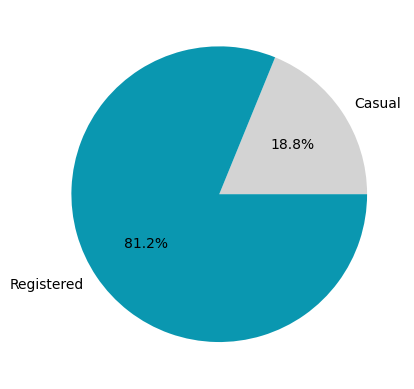

In [26]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#0A97B0"])

# Menampilkan pie plot
plt.show()

**Insight:**

Berdasarkan gambar diatas, penyewa sepeda yang sudah registered sebanyak 81.2% sedangkan sesorang yang belum melakukan regsitered (casual) sebanyak 18.8%.


### Pertanyaan 5: Bagaimana performa total jumlah penyewaan sepeda pada tahun pertama dibandingkan tahun kedua?

<ipython-input-27-a12d5b4f0afc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts_df = day_df.groupby(by=["month","year"]).agg({


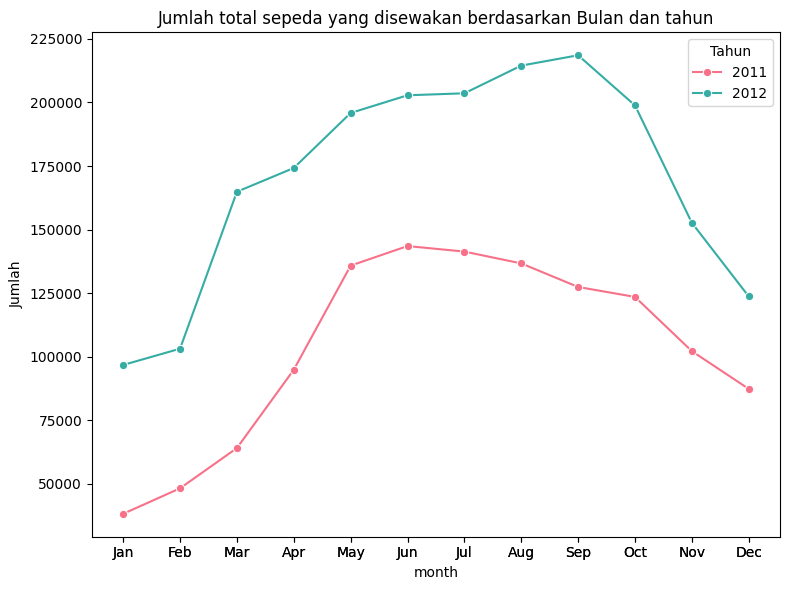

In [27]:
monthly_counts_df = day_df.groupby(by=["month","year"]).agg({
    "count_cr": "sum"
}).reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=monthly_counts_df, x="month", y="count_cr", hue="year", palette="husl", marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xticks(ticks=monthly_counts_df["month"], labels=monthly_counts_df["month"])
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan grafik diatas, penyewaan sepeda meningkat signifikan di tahun 2012 dibandingkan 2011, dengan jumlah penyewaan lebih tinggi hampir setiap bulan. Puncak penyewaan terjadi antara Juni hingga September, dengan 2012 mencatat lebih dari 200.000 penyewaan per bulan, sementara 2011 tetap di bawah 150.000. Pola tren serupa terlihat, dengan peningkatan hingga pertengahan tahun dan penurunan setelah September, menunjukkan performa yang lebih optimal di 2012.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan gambar di atas, dapat dilihat bahwa penyewaan sepeda mencapai jumlah tertinggi pada pukul 17:00, dengan sekitar 336.860 penyewaan. Sebaliknya, penyewaan pada pukul 04:00 tercatat sebagai yang terendah, dengan hanya sekitar 4.428 penyewaan.

- Conclution pertanyaan 2: Musim yang paling banyak disewa adalah musim gugur (Fall) dengan total penyewaan sebanyak 1.061.129 penyewaan. Sementara itu, musim yang paling sedikit penyewa sepeda adalah musim semi (Spring) dengan jumlah 471.348 penyewa.

- Conclution pertanyaan 3: Berdasarkan data, penyewaan sepeda pada tahun 2011 dan 2012 lebih tinggi pada hari biasa (weekdays) dibandingkan dengan hari libur (weekend). Pada tahun 2011, dan 2012, jumlah penyewaan sepeda pada hari biasa mencapai 2.370.845, sementara pada akhir pekan hanya 921.834. Hal ini menunjukkan dominasi aktivitas penyewaan sepeda pada hari kerja, bukan hari libur.


- Conclution pertanyaan 4: Berdasarkan grafik, penyewa sepeda yang sudah registered sebanyak 81.2% sedangkan sesorang yang belum melakukan regsitered (casual) sebanyak 18.8%. Atau berdasarkan data pada tahun 2011, pelanggan yang sudah menjadi member sebanyak 995.851, sementara yang belum menjadi member tercatat 247.252.

- Conclution pertanyaan 5: Berdasarkan grafik, penyewaan sepeda meningkat signifikan di tahun 2012 dibandingkan 2011, dengan jumlah penyewaan lebih tinggi hampir setiap bulan. Puncak penyewaan terjadi antara Juni hingga September, dengan 2012 mencatat lebih dari 200.000 penyewaan per bulan, sementara 2011 tetap di bawah 150.000. Pola tren serupa terlihat, dengan peningkatan hingga pertengahan tahun dan penurunan setelah September, menunjukkan performa yang lebih optimal di 2012.

## Analisis Lanjutan

### 1. Analisis Clustering

-  Total Pengguna Berdasarkan weather_situation

In [28]:
hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


<ipython-input-28-89d5da45a76e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


,count_cr
weather_situation,
Clear,848
Misty,649
Light_rainsnow,368
Heavy_rainsnow,3


Berdasarkan hasil analisis, kelompok pengguna cenderung lebih banyak menyewa sepeda pada hari dengan cuaca cerah (clear), menunjukkan bahwa kondisi cuaca yang baik berperan penting dalam peningkatan aktivitas penyewaan sepeda.

- Total Penyewa Sepeda Berdasarkan Humidity

In [29]:
hour_df.groupby(by="humidity_category").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity_category,
Ideal,5505
Terlalu Lembab,8356
Terlalu kering,3518


Berdasarkan hasil analisis, kelompok penyewa cenderung lebih banyak menyewa sepeda pada kondisi kelembapan yang tinggi (terlalu lembab), yang menunjukkan bahwa meskipun kelembapan tinggi, penyewaan sepeda tetap terjadi.

### 2. RFM Analysis

RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:

- **Recency**: Seberapa baru pelanggan berinteraksi dengan bisnis.
- **Frequency**: Seberapa sering pelanggan melakukan transaksi.
- **Monetary**: Seberapa banyak uang yang dibelanjakan pelanggan.

In [30]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602
